In [ ]:
import boto3

Mounted at /content/drive


In [3]:
#!pip install s3fs

In [4]:
#!pip install boto3

In [182]:
# imports 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## APPLE

In [183]:
aapl_df = pd.read_csv('s3://stock-csvs/final_aapl.csv')
aapl_df.head()

,Volume,Date,tweet_count,price_action
0,212818400,02-01-2015,864,-0.467645
1,257142000,05-01-2015,1145,-0.463105
2,263188400,06-01-2015,1184,-0.063563
3,160423600,07-01-2015,1079,0.124857
4,237458000,08-01-2015,1465,0.603852


In [184]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Volume        1254 non-null   int64  
 1   Date          1254 non-null   object 
 2   tweet_count   1254 non-null   int64  
 3   price_action  1254 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 39.3+ KB


In [185]:
aapl_df.isnull().sum()

Volume          0
Date            0
tweet_count     0
price_action    0
dtype: int64

In [186]:
# drop nulls
aapl_df = aapl_df.dropna()

In [187]:
aapl_df.isnull().sum()

Volume          0
Date            0
tweet_count     0
price_action    0
dtype: int64

In [188]:
# drop date?
#aapl_df = aapl_df.drop(columns=['Date'], inplace=True)
#aapl_df.head()

In [189]:
# convert to datetime
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])

In [190]:
aapl_df.dtypes

Volume                   int64
Date            datetime64[ns]
tweet_count              int64
price_action           float64
dtype: object

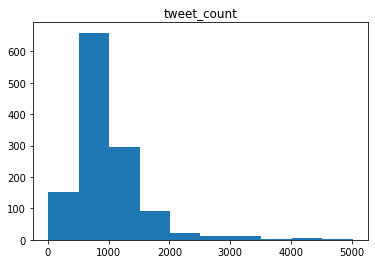

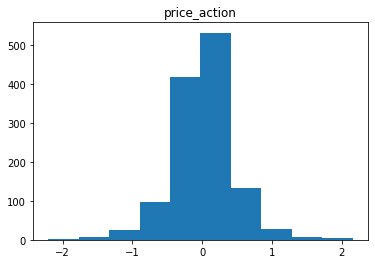

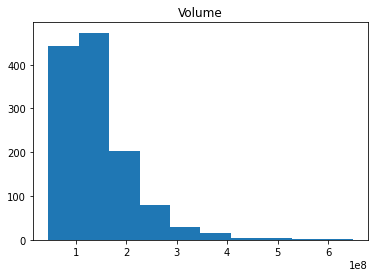

In [191]:
# APPLE's histogram
col = aapl_df[['tweet_count', 'price_action', 'Volume']]
for i in col.columns:
  plt.hist(col[i])
  plt.title(i)
  plt.show()

              tweet_count  price_action    Volume
tweet_count      1.000000     -0.033593  0.626765
price_action    -0.033593      1.000000 -0.118457
Volume           0.626765     -0.118457  1.000000


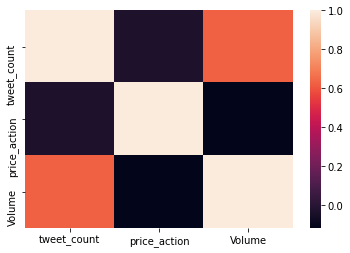

In [192]:
import seaborn as sns 

print(col.corr())
sns.heatmap(col.corr())

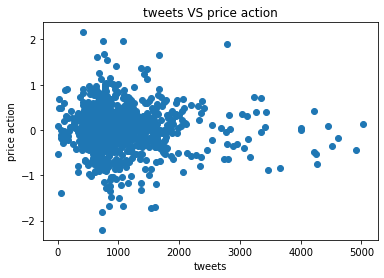

In [193]:
# Realtionship between tweet count and price action

plt.scatter(aapl_df.tweet_count, aapl_df.price_action)
plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

In [194]:
X = aapl_df.tweet_count.values.reshape(-1,1)


In [195]:
X.shape

(1254, 1)

In [196]:
y = aapl_df.price_action

In [197]:
model = LinearRegression()

In [198]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
y_pred = model.predict(X)
print(y_pred.shape)

(1254,)


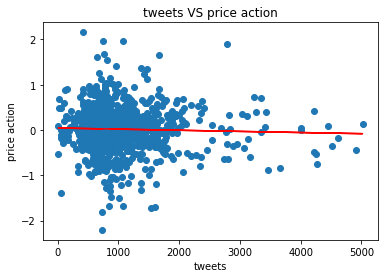

In [200]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

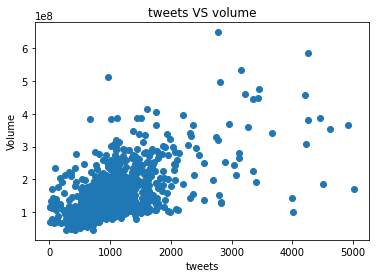

In [201]:
# Realtionship between tweet count and Volume

plt.scatter(aapl_df.tweet_count, aapl_df.Volume)
plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

In [202]:
y = aapl_df.Volume

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

(1254,)


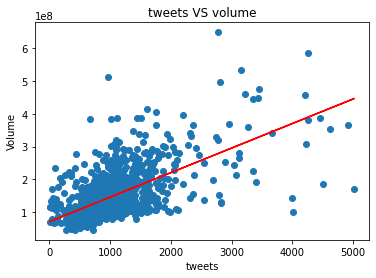

In [203]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

## Amazon

In [204]:
# load 
amzn_df = pd.read_csv('s3://stock-csvs/final_amzn.csv')
amzn_df.head()

,Volume,Date,tweet_count,price_action
0,2783200,02-01-2015,174,-4.059998
1,2774200,05-01-2015,279,-4.820007
2,3519000,06-01-2015,202,-6.949982
3,2640300,07-01-2015,193,0.920013
4,3088400,08-01-2015,215,0.139984


In [205]:
# drop nulls
amzn_df = amzn_df.dropna()

In [206]:
amzn_df.isnull().sum()

Volume          0
Date            0
tweet_count     0
price_action    0
dtype: int64

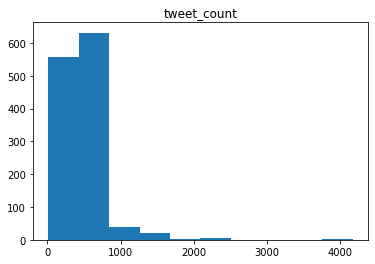

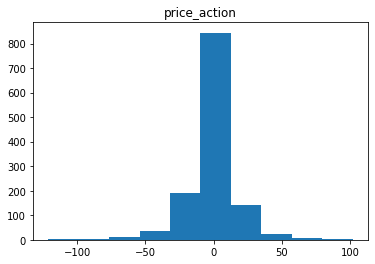

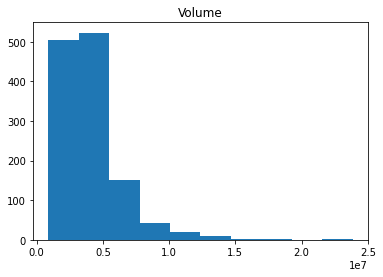

In [207]:
# AMazons's histogram
am_col = amzn_df[['tweet_count', 'price_action', 'Volume']]
for i in am_col.columns:
  plt.hist(am_col[i])
  plt.title(i)
  plt.show()

              tweet_count  price_action    Volume
tweet_count      1.000000      0.018293  0.582459
price_action     0.018293      1.000000 -0.107615
Volume           0.582459     -0.107615  1.000000


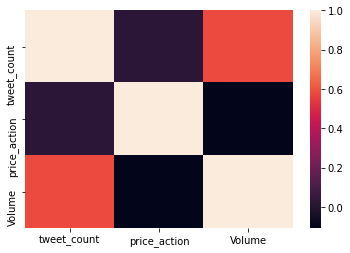

In [208]:
import seaborn as sns 

print(am_col.corr())
sns.heatmap(am_col.corr())

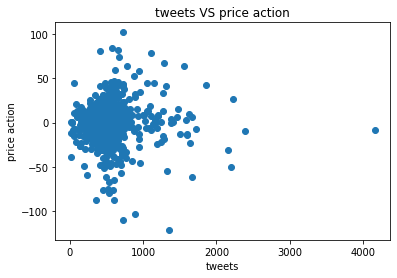

In [210]:
# Realtionship between tweet count and price action

plt.scatter(amzn_df.tweet_count, amzn_df.price_action)
plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

(1257,)


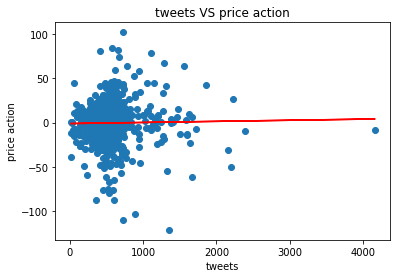

In [211]:
# tweet vs price action, Amzn
X = amzn_df.tweet_count.values.reshape(-1,1)
y = amzn_df.price_action
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

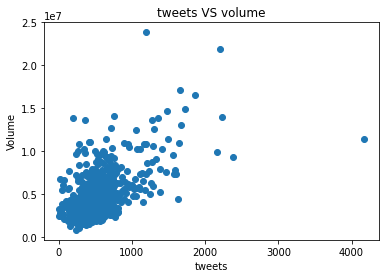

In [212]:
# tweet vs Volume, Amzn
plt.scatter(amzn_df.tweet_count, amzn_df.Volume)

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

In [38]:
y = amzn_df.Volume

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

(1257,)


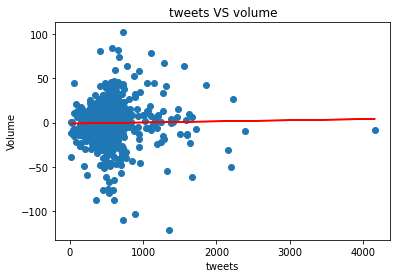

In [213]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

## Google

In [94]:
# load 
goog_df = pd.read_csv('s3://stock-csvs/final_goog.csv')
goog_df.head()

,Volume,Date,tweet_count,price_action
0,1447563,02-01-2015,145,-4.188477
1,2059840,05-01-2015,298,-9.364319
2,2899940,06-01-2015,358,-13.004333
3,2065054,07-01-2015,357,-5.883850
4,3353582,08-01-2015,503,4.677155


In [95]:
# drop nulls
goog_df = goog_df.dropna()
goog_df.isnull().sum()

Volume          0
Date            0
tweet_count     0
price_action    0
dtype: int64

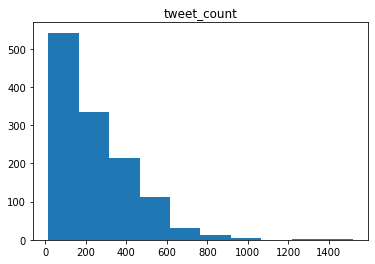

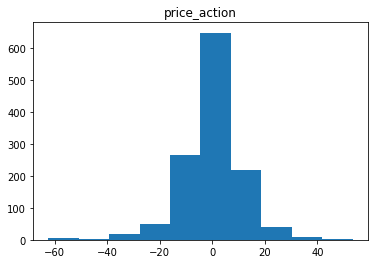

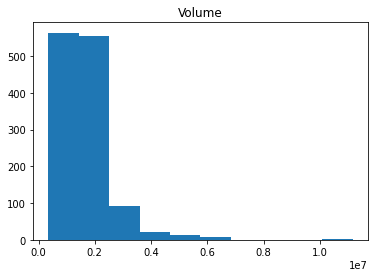

In [96]:
# Google's histogram
g_col = goog_df[['tweet_count', 'price_action', 'Volume']]
for i in g_col.columns:
  plt.hist(g_col[i])
  plt.title(i)
  plt.show()

              tweet_count  price_action    Volume
tweet_count      1.000000     -0.000151  0.362551
price_action    -0.000151      1.000000 -0.112349
Volume           0.362551     -0.112349  1.000000


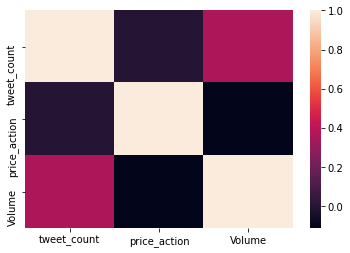

In [97]:
import seaborn as sns 

print(g_col.corr())
sns.heatmap(g_col.corr())

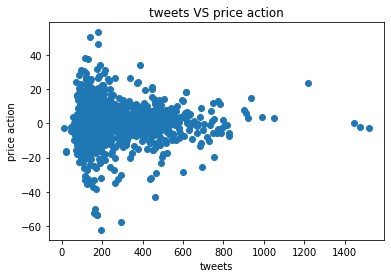

In [214]:
# Realtionship between tweet count and price action

plt.scatter(goog_df.tweet_count, goog_df.price_action)

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

(1256,)


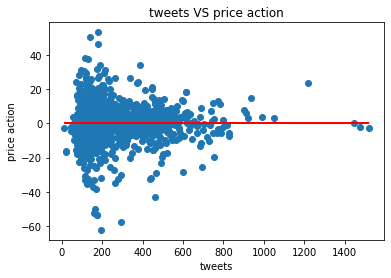

In [215]:
# tweet vs price action, google
X = goog_df.tweet_count.values.reshape(-1,1)
y = goog_df.price_action
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

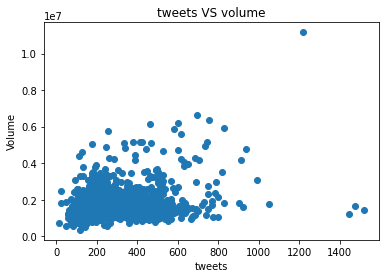

In [216]:
# tweet vs Volume, google
plt.scatter(goog_df.tweet_count, goog_df.Volume)

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

(1256,)


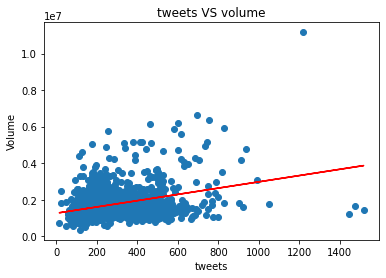

In [217]:
y = goog_df.Volume

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

## Microsoft

In [102]:
# load 
msft_df = pd.read_csv('s3://stock-csvs/final_msft.csv')
msft_df.head()

,Volume,Date,tweet_count,price_action
0,27913900,02-01-2015,107,0.088425
1,39673900,05-01-2015,112,-0.035368
2,36447900,06-01-2015,78,-0.645513
3,29114100,07-01-2015,88,0.221066
4,29645200,08-01-2015,134,0.742782


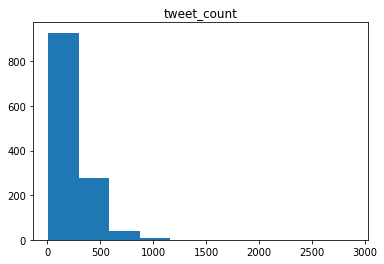

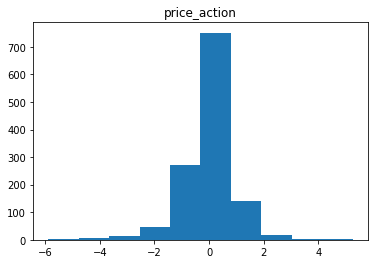

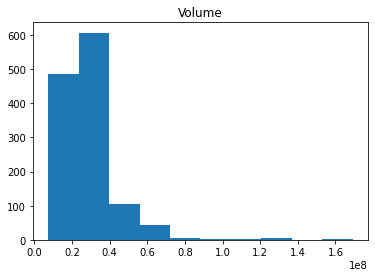

In [103]:
# drop nulls
msft_df = msft_df.dropna()
msft_df.isnull().sum()

# MS's histogram
m_col = msft_df[['tweet_count', 'price_action', 'Volume']]
for i in m_col.columns:
  plt.hist(m_col[i])
  plt.title(i)
  plt.show()

              tweet_count  price_action    Volume
tweet_count      1.000000     -0.004039  0.309094
price_action    -0.004039      1.000000 -0.109855
Volume           0.309094     -0.109855  1.000000


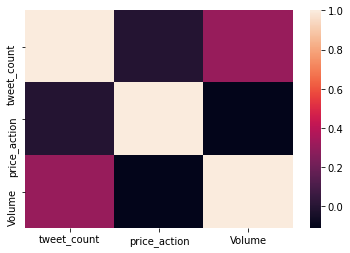

In [104]:
import seaborn as sns 

print(m_col.corr())
sns.heatmap(m_col.corr())

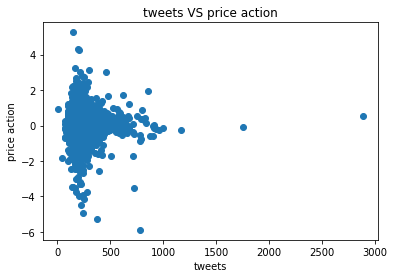

In [218]:
# Realtionship between tweet count and price action

plt.scatter(msft_df.tweet_count, msft_df.price_action)

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

(1257,)


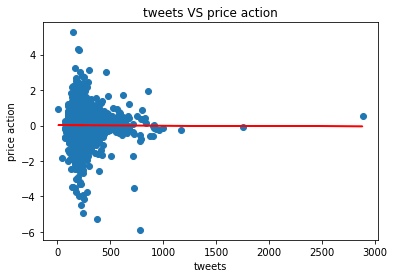

In [219]:
# tweet vs price action, MS
X = msft_df.tweet_count.values.reshape(-1,1)
y = msft_df.price_action
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

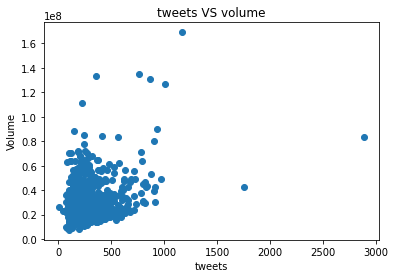

In [220]:
# tweet vs Volume, MS
plt.scatter(msft_df.tweet_count, msft_df.Volume)

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

(1257,)


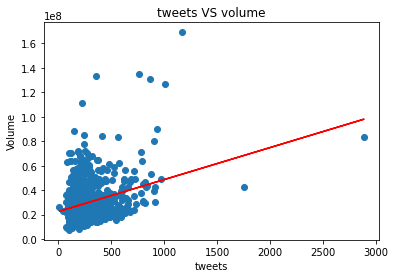

In [221]:
y = msft_df.Volume

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

## Tesla

In [109]:
# load 
tsla_df = pd.read_csv('s3://stock-csvs/final_tsla.csv')
tsla_df.head()

,Volume,Date,tweet_count,price_action
0,23822000,02-01-2015,200,-0.712002
1,26842500,05-01-2015,277,-0.891998
2,31309500,06-01-2015,237,0.243999
3,14842000,07-01-2015,245,-0.480000
4,17212500,08-01-2015,231,-0.438000


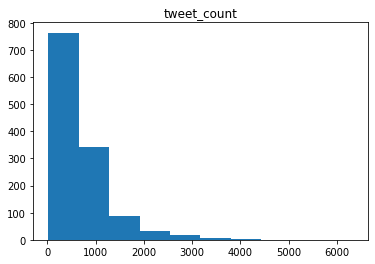

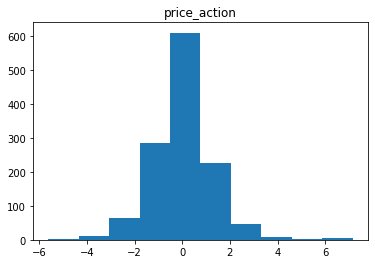

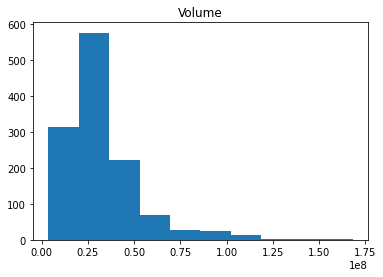

In [110]:
# drop nulls
tsla_df = tsla_df.dropna()
tsla_df.isnull().sum()

# Tesla's histogram
t_col = tsla_df[['tweet_count', 'price_action', 'Volume']]
for i in t_col.columns:
  plt.hist(t_col[i])
  plt.title(i)
  plt.show()

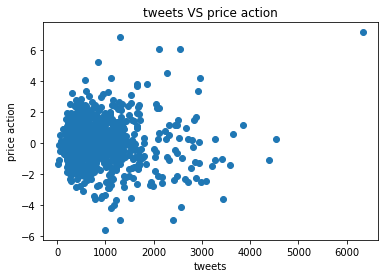

In [222]:
# Realtionship between tweet count and price action

plt.scatter(tsla_df.tweet_count, tsla_df.price_action)
plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

(1257,)


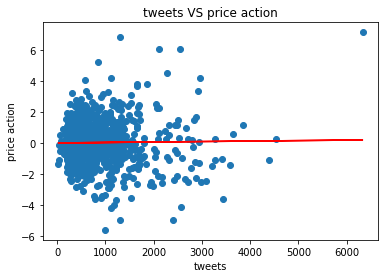

In [223]:
# tweet vs price action, Tesla
X = tsla_df.tweet_count.values.reshape(-1,1)
y = tsla_df.price_action
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS price action')
plt.xlabel('tweets')
plt.ylabel('price action')
plt.show()

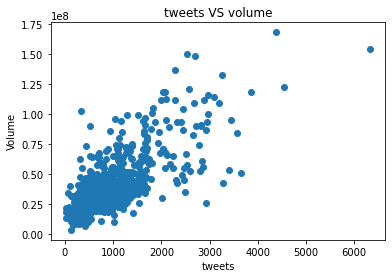

In [224]:
# tweet vs Volume, Tesla
plt.scatter(tsla_df.tweet_count, tsla_df.Volume)

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

(1257,)


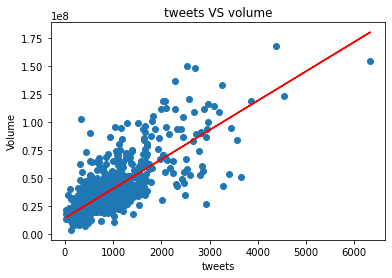

In [225]:
y = tsla_df.Volume

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

plt.title('tweets VS volume')
plt.xlabel('tweets')
plt.ylabel('Volume')
plt.show()

## ML

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [146]:
# Avg tsla daily volume = 25,000,000
tsla_df['liquid_lvl'] = 0

tsla_df.loc[tsla_df['Volume'] >= 25000000, 'liquid_lvl'] = 1 

tsla_df = tsla_df.drop(columns='Date')
tsla_df

,Volume,tweet_count,price_action,liquid_lvl
0,23822000,200,-0.712002,0
1,26842500,277,-0.891998,1
2,31309500,237,0.243999,1
3,14842000,245,-0.480000,0
4,17212500,231,-0.438000,0
...,...,...,...,...
1252,66598000,2513,1.487999,1
1253,40273500,1249,1.378006,1
1254,53169500,1175,0.606003,1
1255,49728500,1274,-0.924004,1


In [147]:
y = tsla_df['liquid_lvl']
X = tsla_df.drop(columns='liquid_lvl')

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

X_train.shape

(942, 3)

In [166]:
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

In [167]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({'Predictions': y_pred, 'Actual': y_test}).reset_index(drop=True)
results

,Predictions,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
310,1,1
311,1,0
312,1,0
313,1,1


In [169]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5746031746031746


## tensorflow

In [171]:
import tensorflow as tf


In [174]:

# Split our preprocessed data into our features and target arrays
y = tsla_df['liquid_lvl'].values
X = tsla_df.drop(['liquid_lvl'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [175]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [176]:
len(X_train[0])

3

In [177]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [178]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [179]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8488 - accuracy: 0.3355
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8025 - accuracy: 0.3524
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7623 - accuracy: 0.3992
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.5064
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5839
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6454
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7059
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7569
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.8057
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5297 - accuracy: 0.8355
Epoch 11/

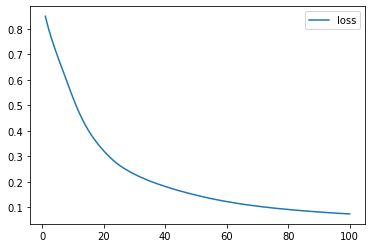

In [180]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

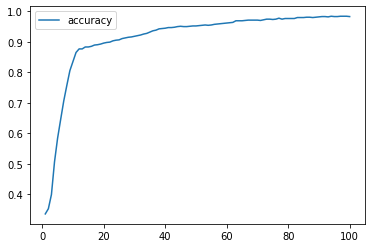

In [181]:
# Plot the accuracy
history_df.plot(y="accuracy")